In [1]:
from activity_1 import variance, arithmetic_average
from activity_2 import confidence_interval
from math import sqrt, fabs
from random import expovariate
from queue import Queue
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_mean_waiting_theoric(lambda_, mi, is_m=True, K=1):
    ro = lambda_ / mi
    
    if is_m:
        return ro / (mi * (1 - ro))
    
    else:
        numerator = ro * (1 + (1 / K))
        denominator = 2 * mi * (1 - ro)
        
        return numerator / denominator

In [3]:
def get_contains_percent_value(turns, theoric_value):
    total = len(turns)
    partial = 0
    
    for turn in turns:
        min_value, max_value = turn['confidence_interval']
        if min_value <= theoric_value <= max_value:
            partial += 1
            
    return partial / total

In [4]:
def mser(data, n=5):
    data_size = len(data)
    K = data_size // n
    
    z_values = [
        arithmetic_average(data[i : i+n])
        for i
        in range(0, data_size, n)
    ]
    
    d_values = []
    for d in range(K//2):
        mser_5y = variance(z_values[d:]) / sqrt(K - d)
        d_values.append(mser_5y)
        
    d = d_values.index(min(d_values))
    #print(f'The first {n * d} elements have been removed')
    #print(f'{data_size - (n * d)} elements left')
    
    return data[d * n:]

In [5]:
def simulate_queue(lambda_, mi, n):
    time_arrival = 1 / lambda_
    time_attendance = 1 / mi
    clock_current = 0
    queue = Queue()
    times_waiting = []
    
    for i in range(n):
        exp_arrival = expovariate(time_arrival)
        exp_attendance = expovariate(time_attendance)
        
        if queue.empty():
            clock_current += exp_arrival
            queue.put(clock_current)
            
        else:
            clock_simulation = clock_current
            
            while clock_current < clock_simulation + exp_arrival and not queue.empty():
                time_waiting = clock_current - queue.get()
                clock_current += exp_attendance
                times_waiting.append(time_waiting)

            if clock_current < clock_simulation + exp_arrival:
                clock_current = clock_simulation + exp_arrival
                queue.put(clock_current)
            else:
                time_to_put = clock_simulation + exp_arrival
                queue.put(time_to_put)

    while not queue.empty():
        time_waiting = clock_current - queue.get()
        clock_current += expovariate(time_attendance)
        times_waiting.append(time_waiting)
        
    return times_waiting

### Traffic intensity 25% (λ: 2.5 ; μ: 10.0)

In [6]:
turns = []
running_times = 100
lambda_ = 2.5
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

In [7]:
x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

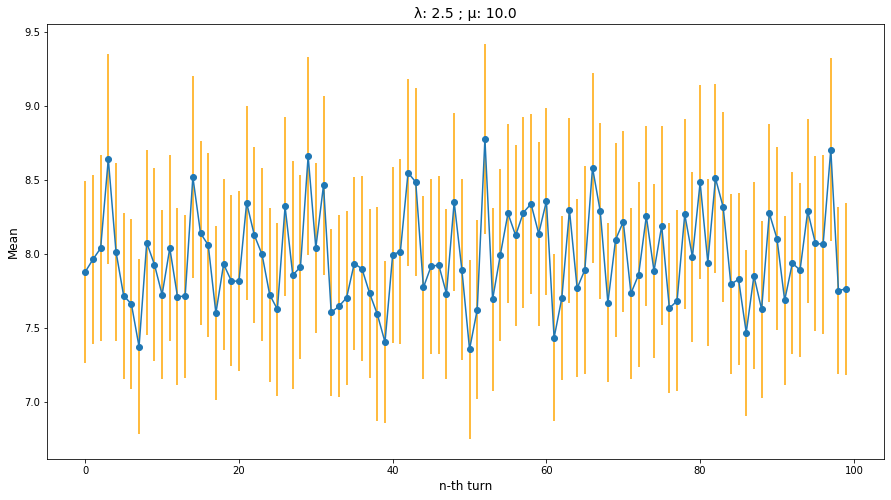

In [8]:
fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

In [9]:
theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')

For λ: 2.5 and μ: 10.0, the theoric value is 0.03333333333333333
The coverage of the confidence interval containing the theoric value is 0.0


### Traffic intensity 25% (λ: 5.0 ; μ: 10.0)

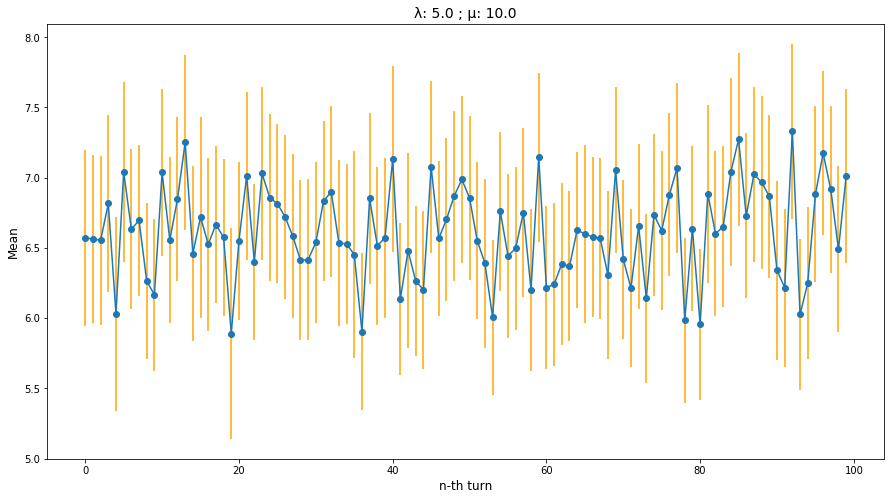

For λ: 5.0 and μ: 10.0, the theoric value is 0.1
The coverage of the confidence interval containing the theoric value is 0.0


In [10]:
turns = []
running_times = 100
lambda_ = 5.0
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')

### Traffic intensity 25% (λ: 5.0 ; μ: 10.0)

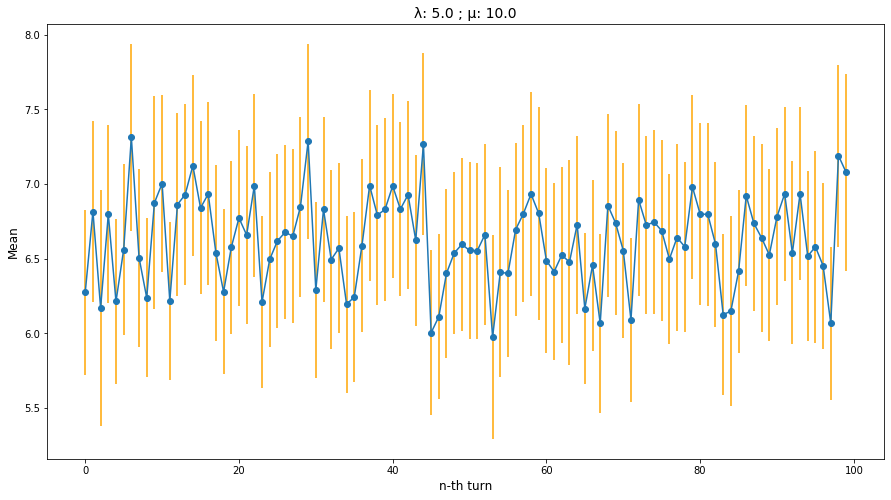

For λ: 5.0 and μ: 10.0, the theoric value is 0.1
The coverage of the confidence interval containing the theoric value is 0.0


In [11]:
turns = []
running_times = 100
lambda_ = 5.0
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')

### Traffic intensity 75% (λ: 7.5 ; μ: 10.0)

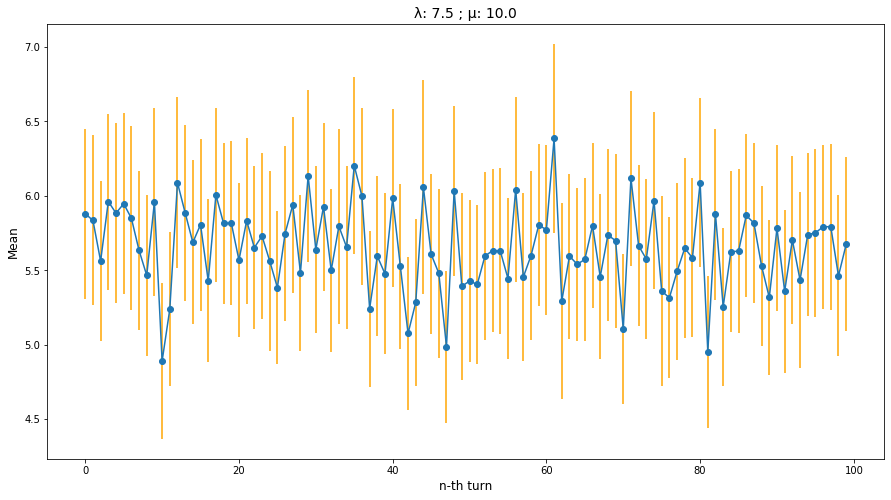

For λ: 7.5 and μ: 10.0, the theoric value is 0.3
The coverage of the confidence interval containing the theoric value is 0.0


In [12]:
turns = []
running_times = 100
lambda_ = 7.5
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')

### Traffic intensity 90% (λ: 9.0 ; μ: 10.0)

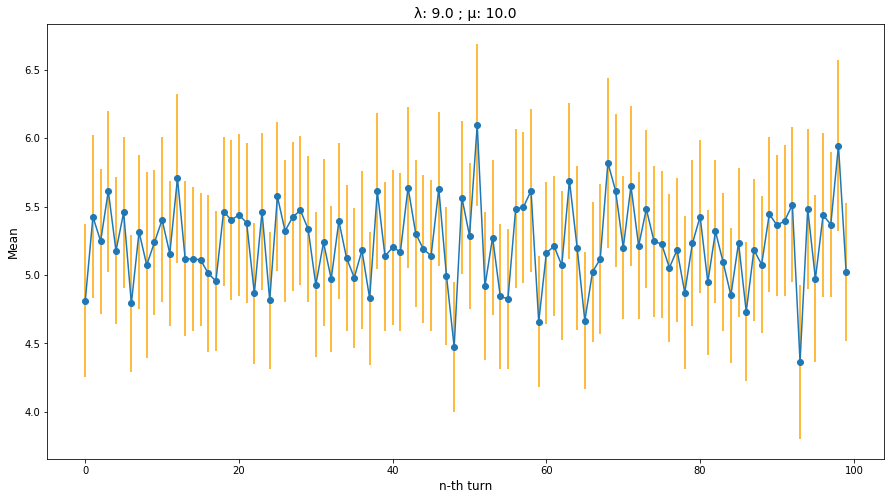

For λ: 9.0 and μ: 10.0, the theoric value is 0.9000000000000002
The coverage of the confidence interval containing the theoric value is 0.0


In [13]:
turns = []
running_times = 100
lambda_ = 9.0
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')

### Traffic intensity 95% (λ: 9.5 ; μ: 10.0)

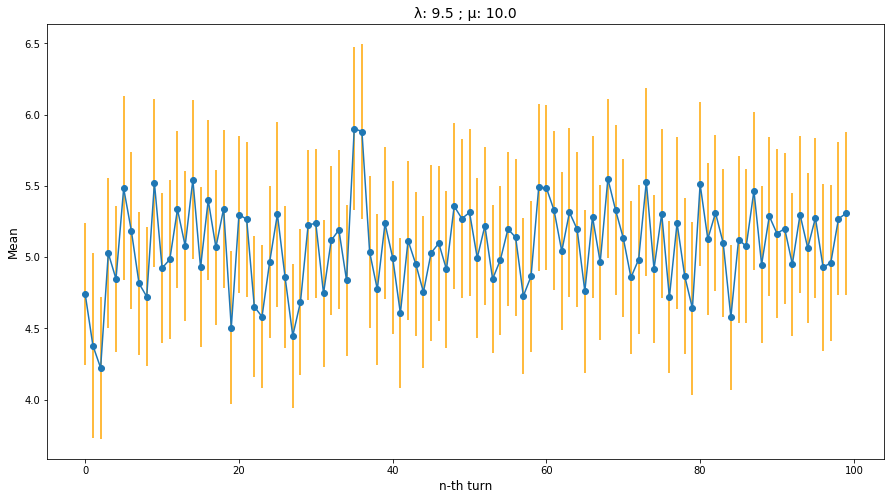

For λ: 9.5 and μ: 10.0, the theoric value is 1.8999999999999981
The coverage of the confidence interval containing the theoric value is 0.0


In [14]:
turns = []
running_times = 100
lambda_ = 9.5
mi = 10.0
n = 1000

for _ in range(running_times):
    turn = {}
    times_queue = simulate_queue(lambda_, mi, n)
    eliminated_transient = mser(times_queue)
    turn['confidence_interval'] = confidence_interval(eliminated_transient, 0.95)
    turn['mean'] = arithmetic_average(eliminated_transient)
    turns.append(turn)

x = [i for i in range(running_times)]
y = [turn['mean'] for turn in turns]
errors = [turn['confidence_interval'] for turn in turns]
errors = [(fabs(y[i]-errors[i][0]), fabs(y[i]-errors[i][1])) for i in range(len(errors))]
errors = [list(i) for i in zip(*errors)]

fig,ax = plt.subplots(figsize=(15, 8))
plt.title(f'λ: {lambda_} ; μ: {mi}', fontsize=14)
ax.errorbar(x,y,yerr=errors, fmt='-o', ecolor='orange')
plt.xlabel('n-th turn', fontsize=12)
plt.ylabel('Mean', fontsize=12)
plt.show()

theoric_value = get_mean_waiting_theoric(lambda_,mi)
contains_percent_value = get_contains_percent_value(turns, theoric_value)

print(f'For λ: {lambda_} and μ: {mi}, the theoric value is {theoric_value}')
print(f'The coverage of the confidence interval containing the theoric value is {contains_percent_value}')